In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [18]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

# DATA COLLECTION

In [19]:
df=pd.read_csv('MW-NIFTY-500-08-Jul-2024.csv') # NIFTY500 data from NSE Website
df

,SYMBOL \n,OPEN \n,HIGH \n,LOW \n,PREV. CLOSE \n,LTP \n,CHNG \n,%CHNG \n,VOLUME \n(shares),VALUE \n (₹ Crores),52W H \n,52W L \n,30 D %CHNG \n,365 D % CHNG \n 07-Jul-2023
0,NIFTY 500,"23,029.35","23,040.75","22,897.95","22,987.65","22,971.15",-16.50,-0.07,"3,70,34,29,691","1,18,676.43","23,040.75","16,466.25",5.62,38.77
1,RVNL,508.00,578.95,508.00,491.05,567.50,76.45,15.57,"17,83,60,632","9,901.69",578.95,117.05,31.10,302.83
2,RCF,205.18,233.00,205.00,203.94,231.00,27.06,13.27,"5,35,84,185","1,177.62",233.00,105.25,32.04,75.28
3,FACT,"1,025.05","1,118.95","1,020.00","1,017.25","1,118.95",101.70,10.00,"43,86,234",476.15,"1,187.00",413.15,45.31,116.83
4,PAYTM,440.20,479.90,440.20,436.55,472.95,36.40,8.34,"1,26,98,807",592.27,998.30,310.00,14.49,-48.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,SCHNEIDER,924.00,930.00,874.00,921.80,880.40,-41.40,-4.49,"4,02,525",35.99,980.00,268.60,23.72,230.39
498,RADICO,"1,718.00","1,718.00","1,636.00","1,716.25","1,639.00",-77.25,-4.50,"3,53,371",58.73,"1,885.10","1,141.25",-0.11,26.65
499,VAIBHAVGBL,341.00,345.50,318.05,337.35,321.05,-16.30,-4.83,"10,84,596",35.71,542.40,262.65,6.49,9.10
500,J&KBANK,112.51,112.77,105.79,112.10,106.50,-5.60,-5.00,"95,19,132",102.56,152.50,66.00,-7.47,63.77


In [195]:
temp=df['SYMBOL \n'][0:].sort_values().to_list() 
tickers=[]
for _ in temp:
    tickers.append(_+".NS")
tickers

['360ONE.NS',
 '3MINDIA.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABB.NS',
 'ABBOTINDIA.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ACC.NS',
 'ACE.NS',
 'ACI.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'AEGISLOG.NS',
 'AETHER.NS',
 'AFFLE.NS',
 'AIAENG.NS',
 'AJANTPHARM.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'ALLCARGO.NS',
 'ALOKINDS.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANANDRATHI.NS',
 'ANGELONE.NS',
 'ANURAS.NS',
 'APARINDS.NS',
 'APLAPOLLO.NS',
 'APLLTD.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ARE&M.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAL.NS',
 'ASTRAZEN.NS',
 'ATGL.NS',
 'ATUL.NS',
 'AUBANK.NS',
 'AUROPHARMA.NS',
 'AVANTIFEED.NS',
 'AWL.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BAJFINANCE.NS',
 'BALAMINES.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'BATAINDIA.NS',
 'BAYERCROP.NS',
 'BBTC.NS',
 'BDL.NS',
 'BE

## For Calculating Dividend Yield of companies 

In [456]:
df_DY = pd.DataFrame()

for ticker in tickers:
    try:
        ticker_data = yf.Ticker(ticker)
        historical_data = ticker_data.history(period="5y")
        historical_data.drop(columns=['Open', 'High', 'Low', 'Stock Splits', 'Volume'], inplace=True) # Removing unecessary columns
        historical_data.reset_index(inplace=True)

        
        filtr = historical_data['Dividends'] > 0
        dividend_data = historical_data[filtr]
        
        dividend_count = dividend_data.shape[0] # Number of times a company announced dividend in past 5 years


        historical_data['Year'] = historical_data['Date'].dt.year
        historical_data['Month'] = historical_data['Date'].dt.month

    
        dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3, 
                                                  dividend_data['Date'].dt.year, 
                                                  dividend_data['Date'].dt.year - 1) #Date Adjustment for a financial year

        annual_dividends = dividend_data.groupby('Dividend_Year')['Dividends'].sum().reset_index() #Sum up annual dividends


        
        average_prices = historical_data.groupby('Year')['Close'].mean().reset_index() # Average stock price for each year

        
        merged_data = pd.merge(annual_dividends, average_prices, left_on='Dividend_Year', right_on='Year', how='left')# Merge annual dividends with average prices

        
        merged_data['Dividend_Yield'] = merged_data['Dividends'] / merged_data['Close'] #Dividend Yield

       
        merged_data = merged_data[['Dividend_Year', 'Dividend_Yield']].set_index('Dividend_Year').T
        merged_data.columns = [f'DY_{int(col)}-{int(col+1)}' for col in merged_data.columns]

        merged_data['Company'] = ticker
        
        merged_data['Dividend_Count'] = dividend_count

        
        df_DY = pd.concat([df_DY, merged_data], ignore_index=True) # Append to the final DataFrame
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Set the company column as the index
df_DY.set_index('Company', inplace=True)

# For Exporting 
df_DY.to_csv('Dividend_yield_NIFTY500_2.csv')



C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing ACI.NS: "['Stock Splits'] not found in axis"
Error processing ADANIENSOL.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
AEGISLOG.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']


Error processing AEGISLOG.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing ARE&M.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing BIKAJI.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing CELLO.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing CONCORDBIO.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing DOMS.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing FIVESTAR.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing HAPPYFORGE.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing HONASA.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing JIOFIN.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing JSWINFRA.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing KAYNES.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
KFINTECH.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing KFINTECH.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
KPIL.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing KPIL.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing LLOYDSME.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing MANKIND.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing MEDANTA.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing NIFTY 500.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
NSLNISP.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing NSLNISP.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
NUVAMA.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing NUVAMA.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing PPLPHARMA.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing PVRINOX.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing RRKABEL.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing SBFC.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing SIGNATURE.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing SYRMA.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing TATATECH.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing TMB.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing TVSSCS.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

Error processing UNITDSPR.NS: "['Stock Splits'] not found in axis"


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_data['Dividend_Year'] = np.where(dividend_data['Date'].dt.month > 3,
C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\733358064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

# For Calculating payout ratio


In [294]:
df_payout_ratio = pd.DataFrame()

for ticker in tickers:
    try:
        ticker_data = yf.Ticker(ticker)

        hist = ticker_data.history(period="5y")
        dividends = hist['Dividends'].fillna(0)

        annual_financials = ticker_data.financials
        
        annual_financials=annual_financials.transpose()
        
        
        annual_net_income = annual_financials['Net Income'].sum()  # annual net income

        
        annual_dividends = dividends.resample('Y').sum()  # Aggregate dividends for the year

    
        payout_ratio = annual_dividends / annual_net_income

      
        df_result = pd.DataFrame({
            'Company': [ticker] * len(payout_ratio), 
            'Year': annual_dividends.index.year,  
            'Annual_Net_Income': annual_net_income,
            'Annual_Dividends': annual_dividends,
            'Payout_Ratio': payout_ratio
        })

      
        df_payout_ratio = pd.concat([df_payout_ratio, df_result], ignore_index=True)   # Append to the final DataFrame
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# For Exporting 
#df_payout_ratio.to_csv('Payout_ratio_NIFTY500_annual.csv', index=False)

df_payout_ratio

ACI.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']
ADANIENSOL.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing ACI.NS: 'Dividends'
Error processing ADANIENSOL.NS: 'Dividends'


AEGISLOG.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']


Error processing AEGISLOG.NS: 'Dividends'


ARE&M.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing ARE&M.NS: 'Dividends'


BIKAJI.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing BIKAJI.NS: 'Dividends'


CELLO.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing CELLO.NS: 'Dividends'


CONCORDBIO.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing CONCORDBIO.NS: 'Dividends'


DOMS.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing DOMS.NS: 'Dividends'


FIVESTAR.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing FIVESTAR.NS: 'Dividends'


HAPPYFORGE.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing HAPPYFORGE.NS: 'Dividends'


HONASA.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing HONASA.NS: 'Dividends'


JIOFIN.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing JIOFIN.NS: 'Dividends'


JSWINFRA.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing JSWINFRA.NS: 'Dividends'


KAYNES.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing KAYNES.NS: 'Dividends'


KFINTECH.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing KFINTECH.NS: 'Dividends'


KPIL.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing KPIL.NS: 'Dividends'


LLOYDSME.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing LLOYDSME.NS: 'Dividends'


MANKIND.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing MANKIND.NS: 'Dividends'


MEDANTA.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing MEDANTA.NS: 'Dividends'


NIFTY 500.NS: No data found, symbol may be delisted


Error processing NIFTY 500.NS: 'Dividends'


NSLNISP.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing NSLNISP.NS: 'Dividends'


NUVAMA.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing NUVAMA.NS: 'Dividends'


PPLPHARMA.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing PPLPHARMA.NS: 'Dividends'


PVRINOX.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing PVRINOX.NS: 'Dividends'


RRKABEL.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing RRKABEL.NS: 'Dividends'


SBFC.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing SBFC.NS: 'Dividends'


SIGNATURE.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing SIGNATURE.NS: 'Dividends'


SYRMA.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing SYRMA.NS: 'Dividends'


TATATECH.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing TATATECH.NS: 'Dividends'


TMB.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Error processing TMB.NS: 'Dividends'


TVSSCS.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Error processing TVSSCS.NS: 'Dividends'


UNITDSPR.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']


Error processing UNITDSPR.NS: 'Dividends'


,Company,Year,Annual_Net_Income,Annual_Dividends,Payout_Ratio
0,360ONE.NS,2019,2.409072e+10,2.50,1.037744e-10
1,360ONE.NS,2020,2.409072e+10,12.50,5.188720e-10
2,360ONE.NS,2021,2.409072e+10,21.25,8.820824e-10
3,360ONE.NS,2022,2.409072e+10,13.00,5.396269e-10
4,360ONE.NS,2023,2.409072e+10,16.25,6.745336e-10
...,...,...,...,...,...
2709,ZYDUSLIFE.NS,2020,1.242230e+11,3.50,2.817514e-11
2710,ZYDUSLIFE.NS,2021,1.242230e+11,3.50,2.817514e-11
2711,ZYDUSLIFE.NS,2022,1.242230e+11,2.50,2.012510e-11
2712,ZYDUSLIFE.NS,2023,1.242230e+11,12.00,9.660047e-11


In [403]:
#df_payout_ratio.to_csv('Payout_ratio_NIFTY500_annual.csv', index=False)

In [457]:
df_DY=pd.read_csv('Dividend_yield_NIFTY500_2.csv',index_col='Company')

df_payout_ratio=pd.read_csv('Payout_ratio_NIFTY500_annual.csv',index_col='Company')

df_DY

,DY_2019-2020,DY_2020-2021,DY_2021-2022,DY_2022-2023,DY_2023-2024,DY_2024-2025,Dividend_Count
Company,,,,,,,
360ONE.NS,0.019496,0.078429,0.045716,0.044389,0.034638,0.004712,15
3MINDIA.NS,NaN,NaN,NaN,0.040140,0.003762,0.016313,3
AARTIIND.NS,0.007533,0.002541,0.004224,0.003101,0.002897,NaN,10
AAVAS.NS,NaN,NaN,NaN,NaN,NaN,NaN,0
ABB.NS,NaN,0.009820,0.005943,0.002018,0.002826,0.003690,8
...,...,...,...,...,...,...,...
ZEEL.NS,0.011624,0.001588,0.010619,0.011735,NaN,NaN,4
ZENSARTECH.NS,0.033688,0.008087,0.011223,0.017571,0.013740,NaN,11
ZFCVINDIA.NS,0.003098,NaN,0.001597,0.001403,0.002081,NaN,6


# Preprocessing Steps 


In [458]:
df_DY.reset_index(inplace=True) # df_DY is dataframe consisting of Dividend yield of commpanies with company names as index and financial years as Columns
df_DY.head(10)

,Company,DY_2019-2020,DY_2020-2021,DY_2021-2022,DY_2022-2023,DY_2023-2024,DY_2024-2025,Dividend_Count
0,360ONE.NS,0.019496,0.078429,0.045716,0.044389,0.034638,0.004712,15
1,3MINDIA.NS,NaN,NaN,NaN,0.040140,0.003762,0.016313,3
2,AARTIIND.NS,0.007533,0.002541,0.004224,0.003101,0.002897,NaN,10
3,AAVAS.NS,NaN,NaN,NaN,NaN,NaN,NaN,0
4,ABB.NS,NaN,0.009820,0.005943,0.002018,0.002826,0.003690,8
5,ABBOTINDIA.NS,0.002894,0.009458,0.009131,0.007184,0.013035,NaN,7
6,ABCAPITAL.NS,NaN,NaN,NaN,NaN,NaN,NaN,0
7,ABFRL.NS,NaN,NaN,NaN,NaN,NaN,NaN,0
8,ACC.NS,NaN,0.021136,NaN,0.025810,0.004838,0.002981,5
9,ACE.NS,0.013834,NaN,0.002505,0.002417,0.001746,NaN,5


In [459]:
df_DY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         470 non-null    object 
 1   DY_2019-2020    314 non-null    float64
 2   DY_2020-2021    236 non-null    float64
 3   DY_2021-2022    341 non-null    float64
 4   DY_2022-2023    379 non-null    float64
 5   DY_2023-2024    396 non-null    float64
 6   DY_2024-2025    135 non-null    float64
 7   Dividend_Count  470 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 29.5+ KB


In [460]:
df_DY.fillna(0,inplace=True) # Filling out Null data with 0
df_DY

,Company,DY_2019-2020,DY_2020-2021,DY_2021-2022,DY_2022-2023,DY_2023-2024,DY_2024-2025,Dividend_Count
0,360ONE.NS,0.019496,0.078429,0.045716,0.044389,0.034638,0.004712,15
1,3MINDIA.NS,0.000000,0.000000,0.000000,0.040140,0.003762,0.016313,3
2,AARTIIND.NS,0.007533,0.002541,0.004224,0.003101,0.002897,0.000000,10
3,AAVAS.NS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,ABB.NS,0.000000,0.009820,0.005943,0.002018,0.002826,0.003690,8
...,...,...,...,...,...,...,...,...
465,ZEEL.NS,0.011624,0.001588,0.010619,0.011735,0.000000,0.000000,4
466,ZENSARTECH.NS,0.033688,0.008087,0.011223,0.017571,0.013740,0.000000,11
467,ZFCVINDIA.NS,0.003098,0.000000,0.001597,0.001403,0.002081,0.000000,6
468,ZOMATO.NS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [461]:
df_DY['Avg_Dividend'] = df_DY.iloc[:, :-1].mean(axis=1)

df_DY


C:\Users\Garvit\AppData\Local\Temp\ipykernel_32720\1049325672.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_DY['Avg_Dividend'] = df_DY.iloc[:, :-1].mean(axis=1)


,Company,DY_2019-2020,DY_2020-2021,DY_2021-2022,DY_2022-2023,DY_2023-2024,DY_2024-2025,Dividend_Count,Avg_Dividend
0,360ONE.NS,0.019496,0.078429,0.045716,0.044389,0.034638,0.004712,15,0.037897
1,3MINDIA.NS,0.000000,0.000000,0.000000,0.040140,0.003762,0.016313,3,0.010036
2,AARTIIND.NS,0.007533,0.002541,0.004224,0.003101,0.002897,0.000000,10,0.003383
3,AAVAS.NS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,ABB.NS,0.000000,0.009820,0.005943,0.002018,0.002826,0.003690,8,0.004050
...,...,...,...,...,...,...,...,...,...
465,ZEEL.NS,0.011624,0.001588,0.010619,0.011735,0.000000,0.000000,4,0.005928
466,ZENSARTECH.NS,0.033688,0.008087,0.011223,0.017571,0.013740,0.000000,11,0.014051
467,ZFCVINDIA.NS,0.003098,0.000000,0.001597,0.001403,0.002081,0.000000,6,0.001363
468,ZOMATO.NS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000


# Visualisations

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns
df_DY.set_index('Company',inplace=True)

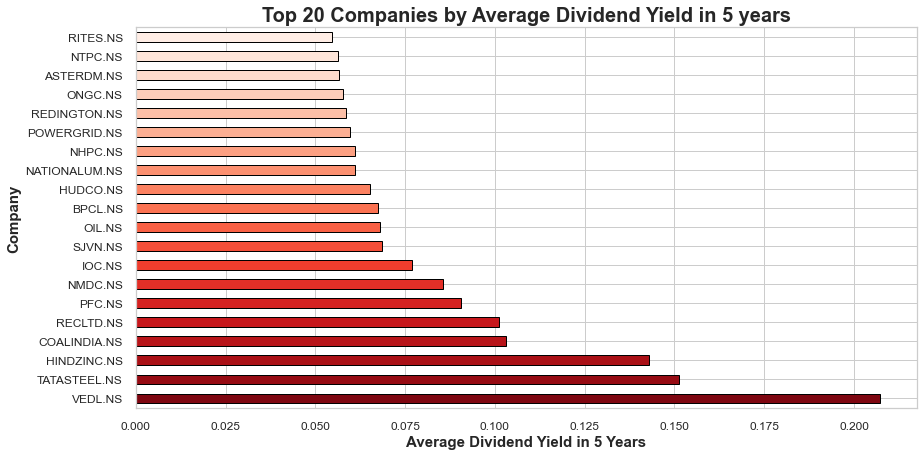

In [463]:

sns.set(style="whitegrid")
colors = sns.color_palette("Reds_r", 20)

# Plotting the top 20 dividend yielding companies by average dividend yield
df_DY['Avg_Dividend'].nlargest(20).plot(
    kind='barh', 
    figsize=(14, 7), 
    color=colors, 
    edgecolor='black', 
    linewidth=1
)

plt.title('Top 20 Companies by Average Dividend Yield in 5 years', fontsize=20, fontweight='bold')
plt.xlabel('Average Dividend Yield in 5 Years', fontsize=15, fontweight='bold')
plt.ylabel('Company', fontsize=15, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


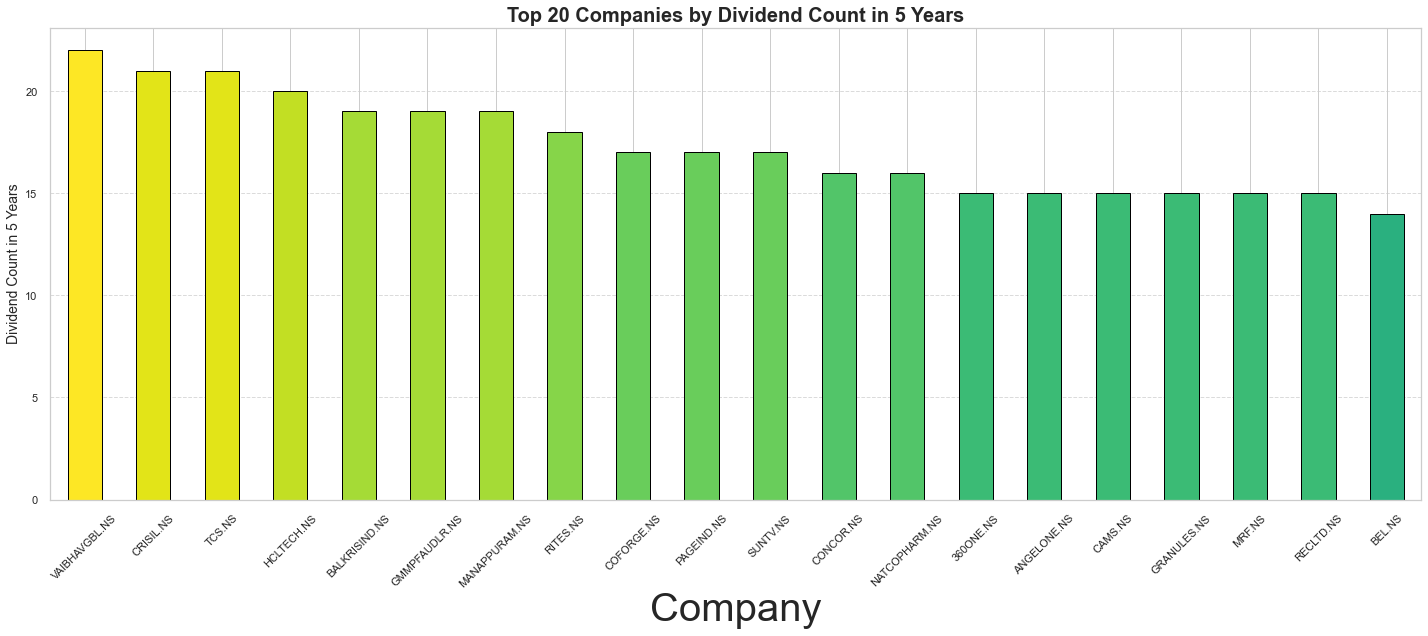

In [465]:

# Plotting the top 20 companies by dividend count
top_20 = df_DY['Dividend_Count'].nlargest(20)
colors = plt.cm.viridis(top_20.values / max(top_20.values))
top_20.plot(
    kind='bar', 
    figsize=(20, 9), 
    rot=45, 
    color=colors, 
    edgecolor='black', 
    linewidth=1
)

plt.title('Top 20 Companies by Dividend Count in 5 Years', fontsize=20,fontweight='bold')
plt.xlabel('Company', fontsize=40)
plt.ylabel('Dividend Count in 5 Years', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()


In [466]:
df_payout_ratio

,Year,Annual_Net_Income,Annual_Dividends,Payout_Ratio
Company,,,,
360ONE.NS,2019,2.409072e+10,2.50,1.037744e-10
360ONE.NS,2020,2.409072e+10,12.50,5.188720e-10
360ONE.NS,2021,2.409072e+10,21.25,8.820824e-10
360ONE.NS,2022,2.409072e+10,13.00,5.396269e-10
360ONE.NS,2023,2.409072e+10,16.25,6.745336e-10
...,...,...,...,...
ZYDUSLIFE.NS,2020,1.242230e+11,3.50,2.817514e-11
ZYDUSLIFE.NS,2021,1.242230e+11,3.50,2.817514e-11
ZYDUSLIFE.NS,2022,1.242230e+11,2.50,2.012510e-11


In [467]:
Company_group=df_payout_ratio.groupby(['Company'])

In [433]:
Company_group['Payout_Ratio'].mean().nlargest(20)

Company
TEJASNET.NS      2.380952e-08
3MINDIA.NS       1.673721e-08
PAGEIND.NS       1.157342e-08
SANOFI.NS        9.941410e-09
PGHH.NS          6.221245e-09
GILLETTE.NS      5.791869e-09
CERA.NS          4.212626e-09
BOSCHLTD.NS      4.124311e-09
SKFINDIA.NS      3.838553e-09
HONAUT.NS        3.738705e-09
BAYERCROP.NS     3.621402e-09
ABBOTINDIA.NS    3.424890e-09
TATAINVEST.NS    3.200473e-09
MCX.NS           3.165210e-09
CAMS.NS          2.850078e-09
BATAINDIA.NS     2.572888e-09
OFSS.NS          2.247210e-09
HEG.NS           2.127786e-09
ASTRAZEN.NS      2.124939e-09
INFY.NS          2.039975e-09
Name: Payout_Ratio, dtype: float64

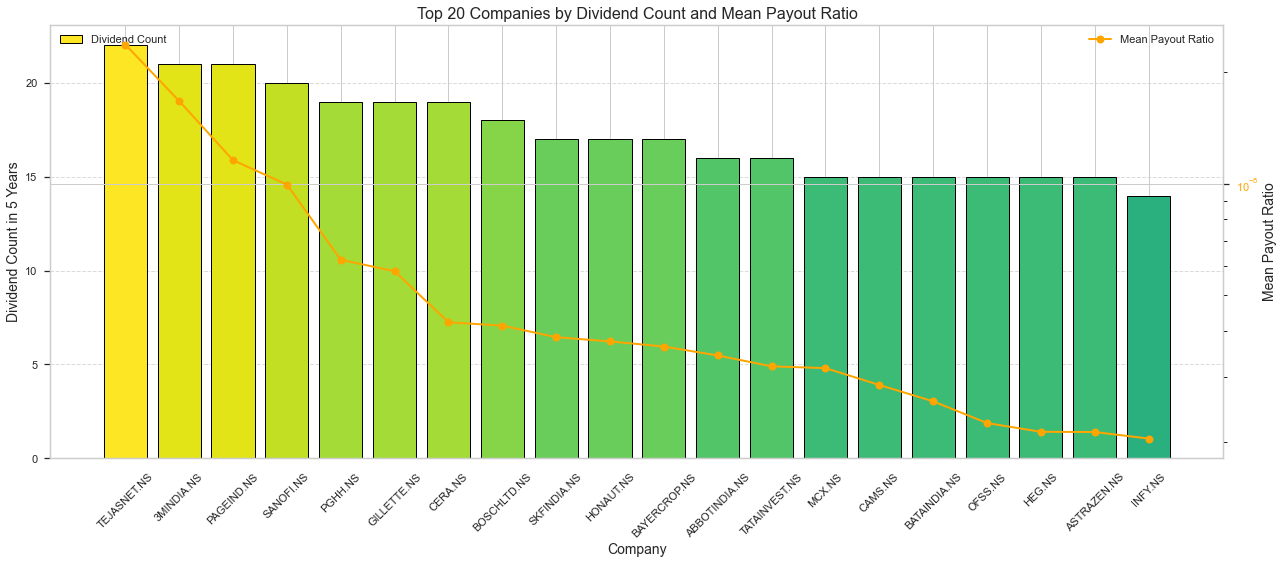

In [468]:
mean_payout_ratio = Company_group['Payout_Ratio'].mean().nlargest(20)


fig, ax1 = plt.subplots(figsize=(18, 8))

# plotting dividend count
ax1.bar(
    top_20.index, 
    top_20.values, 
    color=plt.cm.viridis(top_20.values / max(top_20.values)),  
    edgecolor='black', 
    linewidth=1, 
    label='Dividend Count'
)

ax1.set_xlabel('Company', fontsize=14)
ax1.set_ylabel('Dividend Count in 5 Years', fontsize=14)
ax1.set_title('Top 20 Companies by Dividend Count and Mean Payout Ratio', fontsize=16)
ax1.tick_params(axis='x', rotation=45)  
ax1.grid(axis='y', linestyle='--', alpha=0.7) 
ax1.legend(loc='upper left')

# 2nd y-axis for mean payout ratio
ax2 = ax1.twinx()

# plotting mean payout ratio
ax2.plot(
    mean_payout_ratio.index, 
    mean_payout_ratio.values, 
    color='orange', 
    marker='o', 
    linewidth=2, 
    markersize=8, 
    label='Mean Payout Ratio'
)


ax2.set_ylabel('Mean Payout Ratio', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange') 
ax2.legend(loc='upper right')

# Logarithmic scale for normalised view
ax2.set_yscale('log')

fig.tight_layout()
plt.show()


In [469]:
df_Final = pd.DataFrame()

In [470]:
DIVIDEND_COUNT=df_DY['Dividend_Count']
PAYOUT_RATIO=Company_group['Payout_Ratio'].mean()
DIVIDEND_YIELD=df_DY['Avg_Dividend']


df_Final['DIVIDEND_COUNT'] = DIVIDEND_COUNT
df_Final['AVERAGE PAYOUT_RATIO'] = PAYOUT_RATIO
df_Final['AVERAGE DIVIDEND_YIELD'] = DIVIDEND_YIELD


df_Final

,DIVIDEND_COUNT,AVERAGE PAYOUT_RATIO,AVERAGE DIVIDEND_YIELD
Company,,,
360ONE.NS,15,5.084946e-10,0.037897
3MINDIA.NS,3,1.673721e-08,0.010036
AARTIIND.NS,10,7.334197e-11,0.003383
AAVAS.NS,0,0.000000e+00,0.000000
ABB.NS,8,3.314193e-10,0.004050
...,...,...,...
ZEEL.NS,4,7.932771e-11,0.005928
ZENSARTECH.NS,11,2.145630e-10,0.014051
ZFCVINDIA.NS,6,1.168388e-09,0.001363


In [471]:
from sklearn.preprocessing import MinMaxScaler

In [472]:
scaler = MinMaxScaler()
df_Final[['AVERAGE PAYOUT_RATIO_N', 'AVERAGE DIVIDEND_YIELD_N', 'DIVIDEND_COUNT_N']] = scaler.fit_transform(
    df_Final[['AVERAGE PAYOUT_RATIO', 'AVERAGE DIVIDEND_YIELD', 'DIVIDEND_COUNT']])

# Define weights
weights = {'AVERAGE PAYOUT_RATIO_N': 0.3, 'AVERAGE DIVIDEND_YIELD_N': 0.5, 'DIVIDEND_COUNT_N': 0.2}


df_Final['composite_score_N'] = (df_Final['AVERAGE PAYOUT_RATIO_N'] * weight_payout_ratio +
                   df_Final['AVERAGE DIVIDEND_YIELD_N'] * weight_dividend_yield +
                  df_Final['DIVIDEND_COUNT_N'] * weight_dividend_count)


In [473]:
df_Final['composite_score_N'].nlargest(20)

Company
VEDL.NS          0.629345
HINDZINC.NS      0.445387
TATASTEEL.NS     0.443892
TEJASNET.NS      0.369076
RECLTD.NS        0.351199
COALINDIA.NS     0.343292
PFC.NS           0.319044
SANOFI.NS        0.297838
3MINDIA.NS       0.290647
PAGEIND.NS       0.275761
NMDC.NS          0.273769
IOC.NS           0.264584
OIL.NS           0.254716
RITES.NS         0.251658
BPCL.NS          0.243603
SJVN.NS          0.242167
POWERGRID.NS     0.236847
NATIONALUM.NS    0.236354
HUDCO.NS         0.233908
NTPC.NS          0.223022
Name: composite_score_N, dtype: float64

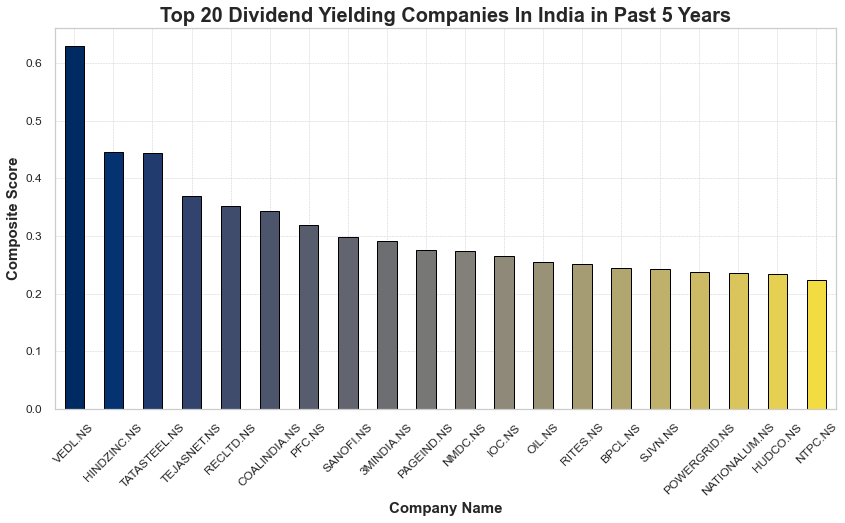

In [474]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

colors = sns.color_palette("cividis", 20)  # Bright and diverse color palette

# plotting the composite scores
top_20 = df_Final['composite_score_N'].nlargest(20)
top_20.plot(
    kind='bar', 
    figsize=(14, 7), 
    color=colors, 
    edgecolor='black', 
    linewidth=1, 
    rot=45 
)

plt.title('Top 20 Dividend Yielding Companies In India in Past 5 Years', fontsize=20, fontweight='bold')
plt.xlabel('Company Name', fontsize=15, fontweight='bold')
plt.ylabel('Composite Score', fontsize=15, fontweight='bold')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.grid(True, linestyle='--', linewidth=0.5)

 plt.show()


In [475]:
TOP_20=df_Final['composite_score_N'].nlargest(20)

In [479]:
TOP_20.reset_index()['Company'] # FINAL LIST OF TOP 20 COMPANIES

0           VEDL.NS
1       HINDZINC.NS
2      TATASTEEL.NS
3       TEJASNET.NS
4         RECLTD.NS
5      COALINDIA.NS
6            PFC.NS
7         SANOFI.NS
8        3MINDIA.NS
9        PAGEIND.NS
10          NMDC.NS
11           IOC.NS
12           OIL.NS
13         RITES.NS
14          BPCL.NS
15          SJVN.NS
16     POWERGRID.NS
17    NATIONALUM.NS
18         HUDCO.NS
19          NTPC.NS
Name: Company, dtype: object

### These Top 20 Companies are Ranked on the basis of separate weights assigned to 3 paramters i.e Average Dividend Yield, Average Payout Ratio, and Dividend Count (Number of times a company announced Dividend in past 5 years) Normalised

# Financial Metrics for Top 20 Companies

In [477]:
results = []

for ticker in TOP_20.reset_index()['Company']:
    try:
        stock_data = yf.download(ticker, period='5y')
        dividend_data = yf.Ticker(ticker).dividends

        dividend_data = dividend_data[(dividend_data.index >= '2019-07-10') & (dividend_data.index <= '2024-07-10')]

        dividend_data = dividend_data.reindex(stock_data.index, fill_value=0)
        
        stock_data['Cumulative Dividends'] = dividend_data.cumsum() # Calculate cumulative dividends

        stock_data['Total Return'] = stock_data['Close'] + stock_data['Cumulative Dividends']

        # total return percentage
        start_price = stock_data['Close'].iloc[0]
        end_price = stock_data['Total Return'].iloc[-1]
        total_return = (end_price - start_price) / start_price

        # Append ticker and total return to results list
        results.append({'Ticker': ticker, 'Total Return (%)': total_return * 100})
    
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Create a DataFrame from results list
df = pd.DataFrame(results)

df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Ticker,Total Return (%)
0,VEDL.NS,185.437508
1,HINDZINC.NS,195.472880
2,TATASTEEL.NS,269.349159
3,TEJASNET.NS,940.878075
4,RECLTD.NS,486.862328
5,COALINDIA.NS,110.306401
6,PFC.NS,461.024403
7,SANOFI.NS,12.479713
8,3MINDIA.NS,78.970946
9,PAGEIND.NS,95.744318


In [478]:
df.sort_values(by='Total Return in 5 Years (%)',ascending=[False], inplace=True)
df.set_index('Ticker')

,Total Return (%)
Ticker,
TEJASNET.NS,940.878075
HUDCO.NS,752.134523
RECLTD.NS,486.862328
PFC.NS,461.024403
SJVN.NS,450.635820
OIL.NS,339.711333
NATIONALUM.NS,325.763090
TATASTEEL.NS,269.349159
RITES.NS,218.346437


In [480]:
df.describe()

,Total Return (%)
count,20.000000
mean,282.239825
std,237.736755
min,12.479713
25%,106.665880
50%,197.601652
75%,367.442455
max,940.878075


In [481]:

results = []


for ticker in TOP_20.reset_index()['Company']:
    try:
        stock_data = yf.download(ticker, period='5y')
        
        dividend_data = yf.Ticker(ticker).dividends
        
        dividend_data = dividend_data[(dividend_data.index >= '2019-07-10') & (dividend_data.index <= '2024-07-10')]
        
        dividend_data = dividend_data.reindex(stock_data.index, fill_value=0)
        
        stock_data['Cumulative Dividends'] = dividend_data.cumsum()

      
        stock_data['Total Return'] = stock_data['Close'] + stock_data['Cumulative Dividends']


        stock_data['Daily Return'] = stock_data['Total Return'].pct_change()

      
        avg_daily_return = stock_data['Daily Return'].mean() # Average Annual return
        annual_return = avg_daily_return * 252  # considering 252 trading days in a year


        std_daily_return = stock_data['Daily Return'].std()  # standard deviation of daily returns (risk)
        annual_std_dev = std_daily_return * np.sqrt(252)  # Annualize standard deviation

    
        # Append results to the list
        results.append({
            'Ticker': ticker,
            'Average Annual Return (%)': annual_return * 100,
            'Annual Standard Deviation (%)': annual_std_dev * 100
        })
    
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

df_results = pd.DataFrame(results)

df_results

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

           Ticker  Average Annual Return (%)  Annual Standard Deviation (%)
0         VEDL.NS                  32.039137                      45.772887
1     HINDZINC.NS                  29.509212                      38.944060
2    TATASTEEL.NS                  34.282573                      38.990867
3     TEJASNET.NS                  63.591204                      56.413252
4       RECLTD.NS                  44.007916                      39.422556
5    COALINDIA.NS                  21.085837                      34.339384
6          PFC.NS                  43.170464                      39.671214
7       SANOFI.NS                   6.723328                      28.035328
8      3MINDIA.NS                  16.797878                      31.559282
9      PAGEIND.NS                  18.297990                      30.434613
10        NMDC.NS                  29.874567                      41.808010
11         IOC.NS                  15.940176                      30.387427
12         O